In [1]:
import logging, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apsopt.core.optimizer import Optimizer, try_parse_dict

logger = logging.getLogger(__name__)

In [2]:
with open('20231113T002038_exp_mobo_6and3_v1_dump.json','r') as f:
    data = json.load(f)
kwargs = try_parse_dict(data, skip_evaluator=True)

In [3]:
opt = Optimizer(**kwargs)

Text(0, 0.5, 'Hypervolume')

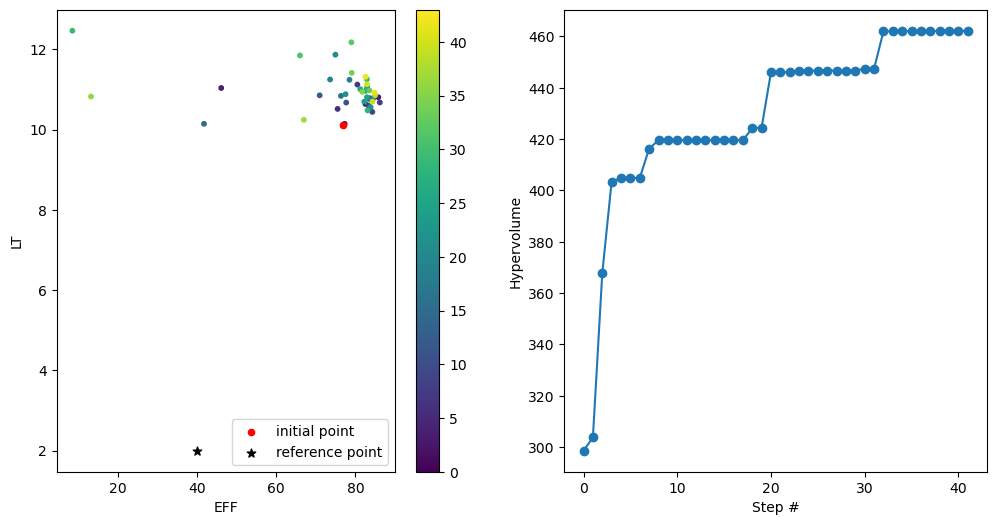

In [4]:
hvs = []
for i in range(1,len(opt.data)):
    hv = opt.generator.calculate_hypervolume_at(i)
    hvs.append(hv)
rp = opt.generator.reference_point

fig,ax = plt.subplots(1,2,squeeze=False,figsize=(12,6))
df = opt.data
ol = ['EFF', 'LT']
l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c=range(len(df)),vmax=len(df))
ax[0,0].scatter(df.loc[:1,ol[0]], df.loc[:1,ol[1]], 20,marker='o',c='red',label='initial point')
ax[0,0].scatter(rp[ol[0]], rp[ol[1]],40,marker='*',c='black',label='reference point')
ax[0,0].set_xlabel(ol[0])
ax[0,0].set_ylabel(ol[1])
fig.colorbar(l)
ax[0,0].legend()

ax[0,1].plot(hvs,marker='o')
ax[0,1].set_xlabel('Step #')
ax[0,1].set_ylabel('Hypervolume')

Text(0, 0.5, 'Hypervolume')

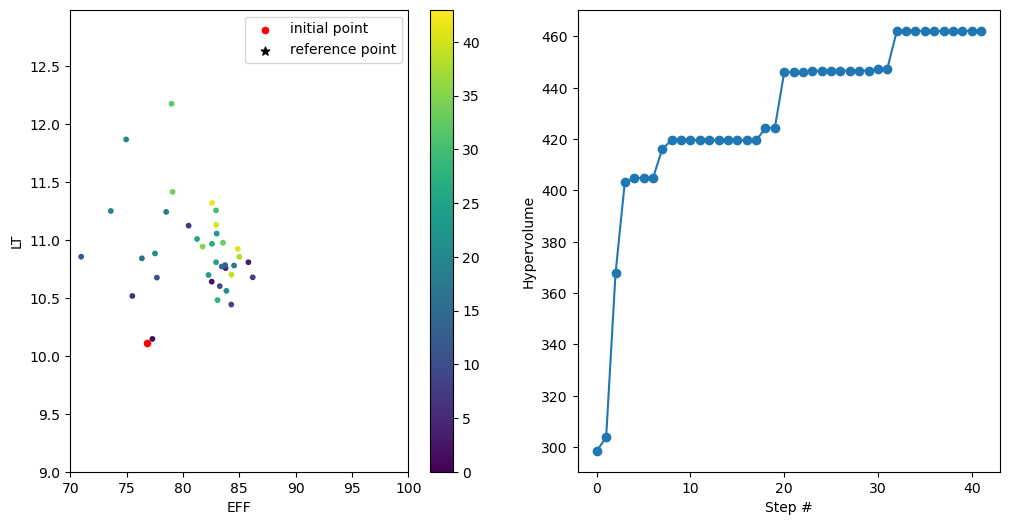

In [5]:
fig,ax = plt.subplots(1,2,squeeze=False,figsize=(12,6))
df = opt.data
ol = ['EFF', 'LT']
l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c=range(len(df)),vmax=len(df))
ax[0,0].scatter(df.loc[:1,ol[0]], df.loc[:1,ol[1]], 20,marker='o',c='red',label='initial point')
ax[0,0].scatter(rp[ol[0]], rp[ol[1]],40,marker='*',c='black',label='reference point')
ax[0,0].set_xlabel(ol[0])
ax[0,0].set_ylabel(ol[1])
fig.colorbar(l)
ax[0,0].legend()
ax[0,0].set_xlim(70,100)
ax[0,0].set_ylim(9,None)

ax[0,1].plot(hvs,marker='o')
ax[0,1].set_xlabel('Step #')
ax[0,1].set_ylabel('Hypervolume')

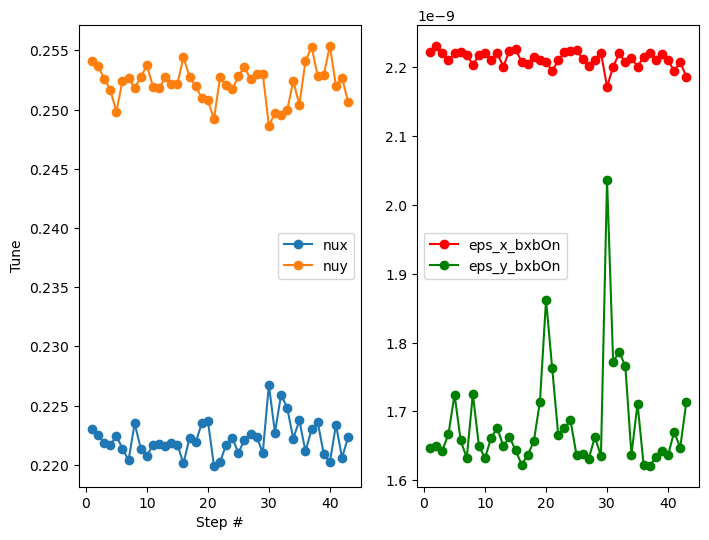

In [37]:
fig,ax = plt.subplots(1,2,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_nux'], marker='o', label='nux')
ax[0,0].plot(df.loc[:,'_nuy'], marker='o', label='nuy')
ax[0,1].plot(df.loc[:,'_eps_x_bxbOn'], marker='o', label='eps_x_bxbOn', color='red')
ax[0,1].plot(df.loc[:,'_eps_y_bxbOn']*1e2, marker='o', label='eps_y_bxbOn', color='green')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Tune')
ax[0,0].legend()
ax[0,1].legend()

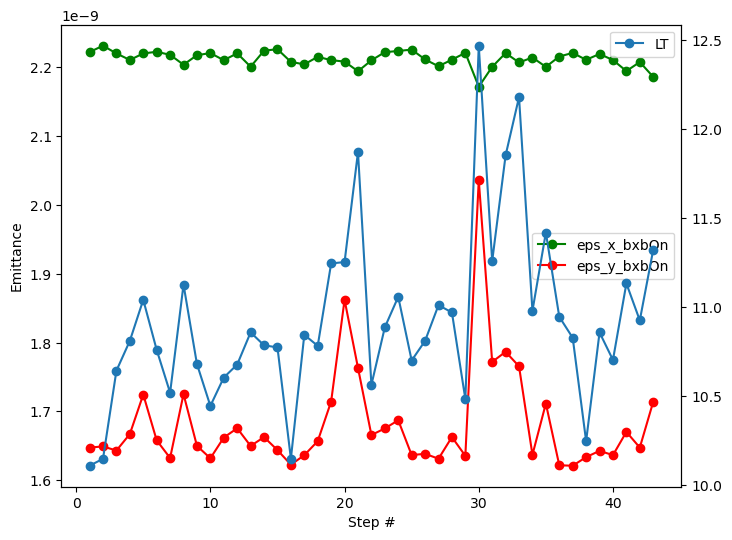

In [40]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_eps_x_bxbOn'],marker='o', label='eps_x_bxbOn', color='green')
ax[0,0].plot(df.loc[:,'_eps_y_bxbOn']*1e2,marker='o', label='eps_y_bxbOn', color='red')
ax2 = ax[0,0].twinx()
ax2.plot(df.loc[:,'LT'],marker='o', label='LT')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Emittance')
ax[0,0].legend()
ax2.legend()

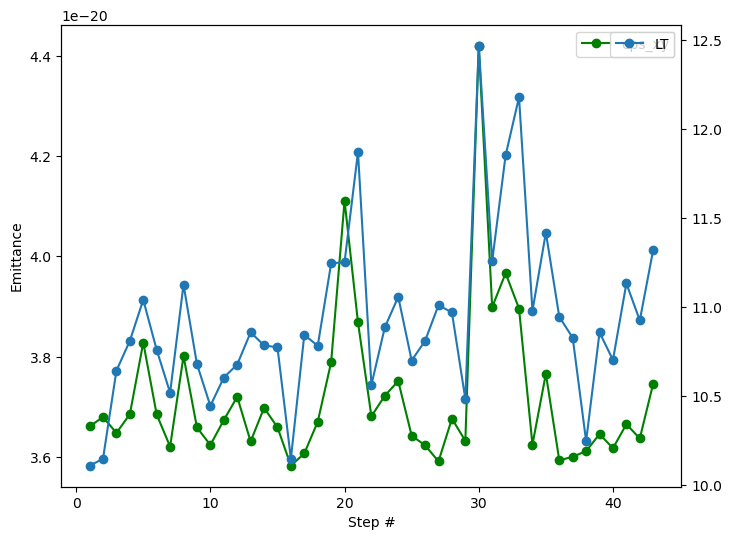

In [42]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_eps_x_bxbOn']*df.loc[:,'_eps_y_bxbOn'],marker='o', label='eps_xy', color='green')
ax2 = ax[0,0].twinx()
ax2.plot(df.loc[:,'LT'],marker='o', label='LT')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Emittance')
ax[0,0].legend()
ax2.legend()